In [1]:
import copy
import importlib
import os
import pathlib
from typing import Any, Mapping, Sequence

In [2]:
import matplotlib as mpl
import numpy as np
import pandas as pd
import ray
import scipy
import seaborn as sns
import tensorflow as tf
from daaf import estimator_metrics
from matplotlib import pyplot as plt
from scipy import stats
from statsmodels.stats import proportion

2024-03-22 00:22:04.844897: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-22 00:22:06.511131: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-22 00:22:06.517458: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-22 00:22:09.494779: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
from utils import dataproc

In [4]:
files = tf.io.gfile.glob(f"{pathlib.Path.home()}/fs/daaf/exp/controljob/agg/1710783127/1710948969/metrics/*.parquet")

In [5]:
df_metrics = dataproc.read_data(files)

/home/guilherme/.pyenv/versions/3.8.15/envs/rl_daaf_py38/lib/python3.8/site-packages/ray/data/datasource/parquet_datasource.py:242: FutureWarning: Passing 'use_legacy_dataset' is deprecated as of pyarrow 15.0.0 and will be removed in a future version.
  pq_ds = pq.ParquetDataset(


Metadata Fetch Progress 0:   0%|          | 0/37 [00:00<?, ?it/s]

2024-03-22 00:22:16,042	INFO worker.py:1715 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8266 


Parquet Files Sample 0:   0%|          | 0/2 [00:00<?, ?it/s]

(_execute_read_task_split pid=3371622) /home/guilherme/.pyenv/versions/3.8.15/envs/rl_daaf_py38/lib/python3.8/site-packages/ray/data/_internal/arrow_block.py:148: FutureWarning: promote has been superseded by promote_options='default'.
(_execute_read_task_split pid=3371622)   return transform_pyarrow.concat(tables)


Read progress 0:   0%|          | 0/187 [00:00<?, ?it/s]

/home/guilherme/.pyenv/versions/3.8.15/envs/rl_daaf_py38/lib/python3.8/site-packages/ray/data/_internal/arrow_block.py:148: FutureWarning: promote has been superseded by promote_options='default'.
  return transform_pyarrow.concat(tables)


In [6]:
df_metrics

,episode,exp_id,meta,returns,metrics,method
0,2020,1710783127-0c58e762-FrozenLake-v1,"{'algorithm': 'sarsa', 'algorithm_args': '{}',...","[0.6902523503216229, 0.6843146956952004, 0.658...","{'returns': {'mean': 0.6277585353785256, 'std'...",PP/IMR
1,2020,1710783127-0c4abb49-ABCSeq,"{'algorithm': 'nstep-sarsa', 'algorithm_args':...","[-8.932211776348343, -9.029688273132113, -8.91...","{'returns': {'mean': -8.972043542800595, 'std'...",PP/LEAST
2,2020,1710783127-0c7d7266-ABCSeq,"{'algorithm': 'nstep-sarsa', 'algorithm_args':...","[-9.040573973280555, -8.904997525977238, -8.89...","{'returns': {'mean': -8.994136566056408, 'std'...",PP/FR
3,2020,1710783127-0c62fb10-ABCSeq,"{'algorithm': 'sarsa', 'algorithm_args': '{}',...","[-99.1578426521524, -100.2350321622959, -100.4...","{'returns': {'mean': -99.71100940128647, 'std'...",OP/OT
4,2020,1710783127-0bf121a4-ABCSeq,"{'algorithm': 'q-learning', 'algorithm_args': ...","[-36.08362196932212, -36.01830776843147, -36.0...","{'returns': {'mean': -36.07530925284512, 'std'...",OP/OT
...,...,...,...,...,...,...
275995,1080,1710783127-fbd9f298-ABCSeq,"{'algorithm': 'q-learning', 'algorithm_args': ...","[-16.896392229417206, -16.861239592969472, -16...","{'returns': {'mean': -16.885522664199815, 'std...",PP/FR
275996,1080,1710783127-e87e1792-IceWorld,"{'algorithm': 'q-learning', 'algorithm_args': ...","[-14.755781683626273, -15.43663274745606, -15....","{'returns': {'mean': -15.024606845513414, 'std...",PP/FR
275997,1080,1710783127-e839088b-TowerOfHanoi,"{'algorithm': 'nstep-sarsa', 'algorithm_args':...","[-37.371877890841816, -35.00185013876041, -35....","{'returns': {'mean': -36.1022664199815, 'std':...",PP/LEAST
275998,1080,1710783127-e8534ab1-TowerOfHanoi,"{'algorithm': 'nstep-sarsa', 'algorithm_args':...","[-34.41258094357077, -35.640148011100834, -37....","{'returns': {'mean': -35.970629047178534, 'std...",PP/LEAST


In [7]:
df_metrics.iloc[0]["meta"]

{'algorithm': 'sarsa',
 'algorithm_args': '{}',
 'discount_factor': 0.99,
 'drop_truncated_feedback_episodes': False,
 'dyna_prog_state_values': array([0.0123561 , 0.01042443, 0.01933841, 0.00947773, 0.01478703,
        0.        , 0.03889444, 0.        , 0.03260246, 0.08433763,
        0.13781085, 0.        , 0.        , 0.17034482, 0.43357944,
        0.        ]),
 'env': {'args': '{"is_slippery": false, "map_name": "4x4"}',
  'level': '4x4',
  'name': 'FrozenLake-v1',
  '_level': 'U75ZLQLLXYRFQE5KOJJGNVQZGQ65U5RVVN3ZV5F4UNYQVK6NGTAAU62O2DKMOEGACNNUQOSWGYYOV7LQHK7GAWG2CL3U3RZJFIEIB5I='},
 'epsilon': 0.2,
 'exp_id': '1710783127-0c58e762-FrozenLake-v1',
 'learning_rate': 0.1,
 'policy_type': 'PP',
 'reward_period': 2,
 'run_id': 10,
 'traj_mapping_method': 'IMR'}

In [8]:
df_wide_metrics = dataproc.wide_metrics(df_metrics)

In [9]:
len(df_wide_metrics["episode"].unique())

250

In [10]:
envs = dataproc.get_distinct_envs(df_wide_metrics)

In [11]:
envs

{('FrozenLake-v1', '4x4'): '{"is_slippery": false, "map_name": "4x4"}',
 ('ABCSeq', 'n=7'): '{"length": 7, "distance_penalty": false}',
 ('ABCSeq', 'n=10'): '{"length": 10, "distance_penalty": false}',
 ('IceWorld', '4x4'): '{"map_name": "4x4"}',
 ('GridWorld',
  '4x12'): '{"grid": "oooooooooooo\\noooooooooooo\\noooooooooooo\\nsxxxxxxxxxxg"}',
 ('RedGreenSeq',
  'n=9'): '{"cure": ["red", "green", "wait", "green", "red", "red", "green", "wait"]}',
 ('TowerOfHanoi', 'disks=4'): '{"num_disks": 4}',
 ('IceWorld', '8x8'): '{"map_name": "8x8"}'}

## Comparison: T-Test

In [12]:
PVALUE_THRESHOLD = 0.05

In [13]:
def sample_stat_test_method_comparison(
    df_data, episode: int
):
    df_result = copy.deepcopy(df_data[df_data["episode"] == episode])
    for key in ("algorithm", "algorithm_args", "reward_period", "discount_factor"):
        df_result[key] = df_result["meta"].apply(lambda meta: meta[key])    
    for key in ("level", "name"):
        df_result[key] = df_result["meta"].apply(lambda meta: meta["env"][key])

    # (env/level)  x (algorithm/algorithm_args) x reward period -> which method is the winner
    df_result["env"] =  df_result["name"] + "/" + df_result["level"]
    del df_result["meta"]    
    del df_result["name"]
    del df_result["level"]
    del df_result["exp_id"]
    
    def mannwhitney_less_than_test(xs, ys):
        xs_stat, pvalue = stats.mannwhitneyu(xs, ys, alternative="less")
        if pvalue < PVALUE_THRESHOLD:
            outcome = "Reject H0 (Less than)"
        else:
            outcome = "Fail to reject H0 (Similar)"
        return outcome

    def ztest(left_pos, left_neg, right_pos, right_neg):
        zstat, pvalue = proportion.proportions_ztest(
            count=left_pos, nobs=left_pos + left_neg, 
            value=right_pos / (right_pos + right_neg)
        )                
        if pvalue < PVALUE_THRESHOLD:
            outcome = "Reject H0 (Different)"
        else:
            outcome = "Fail to reject H0 (Similar)"
        return outcome        
        
    
    algo_types = {
        "one-step": set(["sarsa", "q-learning"]),
        "n-step": set(["nstep-sarsa"]),
    }
    dfs = {}
    df_conf = {}    
    for algo_type, algorithms in algo_types.items():
        df_algo = df_result[df_result["algorithm"].apply(lambda met: met in algorithms)]
        methods = sorted(df_algo["method"].unique())
        rows = []
        keys = ["env", "algorithm", "algorithm_args", "discount_factor", "reward_period"]
        df_baseline = df_algo[df_algo["reward_period"] == 1]
        baselines = {}
        for row in df_baseline.to_dict("records"):
            key = tuple(row[key] for key in keys[:-1])
            baselines[key] = row["returns"]

        df_rp = df_algo[df_algo["reward_period"] != 1]
        rows = []
        for row in df_rp.to_dict("records"):
            key = tuple([row[key] for key in keys[:-1]])
            full_reward_mean_return = baselines[key]
            test_result = mannwhitney_less_than_test(row["returns"], full_reward_mean_return)
            row["mannwhitney_less_than_test"] = test_result
            rows.append(row)
        df_test_result = pd.DataFrame(rows)
        # aggreate over algorithm args and reward periods
        agg_keys = ["method", "mannwhitney_less_than_test"]
         
        df_test_result = df_test_result[agg_keys].value_counts(
        ).reset_index().sort_values(["method", "mannwhitney_less_than_test"]) 
        
        method_rows = df_test_result.pivot(
                index="method", columns="mannwhitney_less_than_test", values="count"
            ).reset_index().to_dict("records")
        df_test_result = pd.DataFrame(method_rows)
        dfs[algo_type] = df_test_result
        
        rows = []
        for left in method_rows:
            for right in method_rows:
                outcome = ztest(
                    left_pos=left["Fail to reject H0 (Similar)"], left_neg = left["Reject H0 (Less than)"],
                    right_pos=right["Fail to reject H0 (Similar)"], right_neg = right["Reject H0 (Less than)"],
                )
                row = {
                    "left": left["method"],
                    "right": right["method"],
                    "outout": outcome,
                }
                rows.append(row)
        df_conf[algo_type] = pd.DataFrame(rows)
    return dfs, df_conf


In [14]:
def rations(df):
    return df["Fail to reject H0 (Similar)"] / (df["Fail to reject H0 (Similar)"] + df["Reject H0 (Less than)"])

**K=100**

In [15]:
df_test_count_k100, df_test_count_stat_k100 = sample_stat_test_method_comparison(df_metrics, episode=100)

In [16]:
df_test_count_k100["one-step"]

,method,Fail to reject H0 (Similar),Reject H0 (Less than)
0,OP/OT,23,73
1,PP/IMR,38,122
2,PP/LEAST,42,118


In [17]:
df_test_count_k100["n-step"]

,method,Fail to reject H0 (Similar),Reject H0 (Less than)
0,PP/IMR,153,103
1,PP/LEAST,161,95
2,PP/nTD-SU,11,53


In [18]:
df_test_count_stat_k100["one-step"]

,left,right,outout
0,OP/OT,OP/OT,Fail to reject H0 (Similar)
1,OP/OT,PP/IMR,Fail to reject H0 (Similar)
2,OP/OT,PP/LEAST,Fail to reject H0 (Similar)
3,PP/IMR,OP/OT,Fail to reject H0 (Similar)
4,PP/IMR,PP/IMR,Fail to reject H0 (Similar)
5,PP/IMR,PP/LEAST,Fail to reject H0 (Similar)
6,PP/LEAST,OP/OT,Fail to reject H0 (Similar)
7,PP/LEAST,PP/IMR,Fail to reject H0 (Similar)
8,PP/LEAST,PP/LEAST,Fail to reject H0 (Similar)


In [19]:
df_test_count_stat_k100["n-step"]

,left,right,outout
0,PP/IMR,PP/IMR,Fail to reject H0 (Similar)
1,PP/IMR,PP/LEAST,Fail to reject H0 (Similar)
2,PP/IMR,PP/nTD-SU,Reject H0 (Different)
3,PP/LEAST,PP/IMR,Fail to reject H0 (Similar)
4,PP/LEAST,PP/LEAST,Fail to reject H0 (Similar)
5,PP/LEAST,PP/nTD-SU,Reject H0 (Different)
6,PP/nTD-SU,PP/IMR,Reject H0 (Different)
7,PP/nTD-SU,PP/LEAST,Reject H0 (Different)
8,PP/nTD-SU,PP/nTD-SU,Fail to reject H0 (Similar)


**K=500**

In [20]:
df_test_count_k500, df_test_count_stat_k500 = sample_stat_test_method_comparison(df_metrics, episode=500)

In [21]:
df_test_count_k500["one-step"]

,method,Fail to reject H0 (Similar),Reject H0 (Less than)
0,OP/OT,4,92
1,PP/IMR,17,143
2,PP/LEAST,24,136


In [22]:
df_test_count_k500["n-step"]

,method,Fail to reject H0 (Similar),Reject H0 (Less than)
0,PP/IMR,112,144
1,PP/LEAST,142,114
2,PP/nTD-SU,6,58


In [23]:
df_test_count_stat_k500["one-step"]

,left,right,outout
0,OP/OT,OP/OT,Fail to reject H0 (Similar)
1,OP/OT,PP/IMR,Reject H0 (Different)
2,OP/OT,PP/LEAST,Reject H0 (Different)
3,PP/IMR,OP/OT,Reject H0 (Different)
4,PP/IMR,PP/IMR,Fail to reject H0 (Similar)
5,PP/IMR,PP/LEAST,Fail to reject H0 (Similar)
6,PP/LEAST,OP/OT,Reject H0 (Different)
7,PP/LEAST,PP/IMR,Fail to reject H0 (Similar)
8,PP/LEAST,PP/LEAST,Fail to reject H0 (Similar)


In [24]:
df_test_count_stat_k500["n-step"]

,left,right,outout
0,PP/IMR,PP/IMR,Fail to reject H0 (Similar)
1,PP/IMR,PP/LEAST,Reject H0 (Different)
2,PP/IMR,PP/nTD-SU,Reject H0 (Different)
3,PP/LEAST,PP/IMR,Reject H0 (Different)
4,PP/LEAST,PP/LEAST,Fail to reject H0 (Similar)
5,PP/LEAST,PP/nTD-SU,Reject H0 (Different)
6,PP/nTD-SU,PP/IMR,Reject H0 (Different)
7,PP/nTD-SU,PP/LEAST,Reject H0 (Different)
8,PP/nTD-SU,PP/nTD-SU,Fail to reject H0 (Similar)


**K = Max(K)**

In [25]:
df_test_count_kmax, df_test_count_stat_kmax = sample_stat_test_method_comparison(df_metrics, episode=df_metrics["episode"].max())

In [26]:
df_test_count_kmax["one-step"]

,method,Fail to reject H0 (Similar),Reject H0 (Less than)
0,OP/OT,4,92
1,PP/IMR,12,148
2,PP/LEAST,16,144


In [27]:
print(df_test_count_kmax["one-step"].to_latex(escape=False, index=False))

\begin{tabular}{lrr}
\toprule
method & Fail to reject H0 (Similar) & Reject H0 (Less than) \\
\midrule
OP/OT & 4 & 92 \\
PP/IMR & 12 & 148 \\
PP/LEAST & 16 & 144 \\
\bottomrule
\end{tabular}



In [28]:
rations(df_test_count_kmax["one-step"])

0    0.041667
1    0.075000
2    0.100000
dtype: float64

In [29]:
df_test_count_kmax["n-step"]

,method,Fail to reject H0 (Similar),Reject H0 (Less than)
0,PP/IMR,97,159
1,PP/LEAST,157,99
2,PP/nTD-SU,9,55


In [30]:
print(df_test_count_kmax["n-step"].to_latex(escape=False, index=False))

\begin{tabular}{lrr}
\toprule
method & Fail to reject H0 (Similar) & Reject H0 (Less than) \\
\midrule
PP/IMR & 97 & 159 \\
PP/LEAST & 157 & 99 \\
PP/nTD-SU & 9 & 55 \\
\bottomrule
\end{tabular}



In [31]:
rations(df_test_count_kmax["n-step"])

0    0.378906
1    0.613281
2    0.140625
dtype: float64

In [32]:
df_test_count_stat_kmax["one-step"]

,left,right,outout
0,OP/OT,OP/OT,Fail to reject H0 (Similar)
1,OP/OT,PP/IMR,Fail to reject H0 (Similar)
2,OP/OT,PP/LEAST,Reject H0 (Different)
3,PP/IMR,OP/OT,Fail to reject H0 (Similar)
4,PP/IMR,PP/IMR,Fail to reject H0 (Similar)
5,PP/IMR,PP/LEAST,Fail to reject H0 (Similar)
6,PP/LEAST,OP/OT,Reject H0 (Different)
7,PP/LEAST,PP/IMR,Fail to reject H0 (Similar)
8,PP/LEAST,PP/LEAST,Fail to reject H0 (Similar)


In [33]:
df_test_count_stat_kmax["n-step"]

,left,right,outout
0,PP/IMR,PP/IMR,Fail to reject H0 (Similar)
1,PP/IMR,PP/LEAST,Reject H0 (Different)
2,PP/IMR,PP/nTD-SU,Reject H0 (Different)
3,PP/LEAST,PP/IMR,Reject H0 (Different)
4,PP/LEAST,PP/LEAST,Fail to reject H0 (Similar)
5,PP/LEAST,PP/nTD-SU,Reject H0 (Different)
6,PP/nTD-SU,PP/IMR,Reject H0 (Different)
7,PP/nTD-SU,PP/LEAST,Reject H0 (Different)
8,PP/nTD-SU,PP/nTD-SU,Fail to reject H0 (Similar)


## Sample distributions

In [34]:
def plot_sample_dist(df_data, num_samples: int = 2):
    df_slice = df_data[df_data["episode"] == df_data["episode"].max()]
    df_slice = df_slice[["method", "meta", "returns"]]
    df_raw = copy.deepcopy(df_slice)
    df_raw["algorithm"] = df_data["meta"].apply(lambda meta: meta["algorithm"])    
    algo_methods = df_raw[["algorithm", "method"]].drop_duplicates().values
    
    fig, axes = plt.subplots(
        nrows=len(algo_methods), ncols=num_samples, figsize=(4*num_samples, 4*len(algo_methods)),
    )
    for row, (algorithm, method) in enumerate(algo_methods):
        df_algomethod = df_raw[
            (df_raw["algorithm"] == algorithm) &
            (df_raw["method"] == method)
        ]
        df_samples = df_algomethod.sample(n=num_samples)
        for idx in range(num_samples):
            ax = axes[row, idx]
            sample = df_samples.iloc[idx]
            miu = np.round(np.mean(sample["returns"]), decimals=2)
            sns.histplot(sample["returns"], ax=ax)
            title_template = " ".join([
                algorithm,
                method,
                "$\mu$ =", str(miu),
            ])
            ax.set_title(title_template)

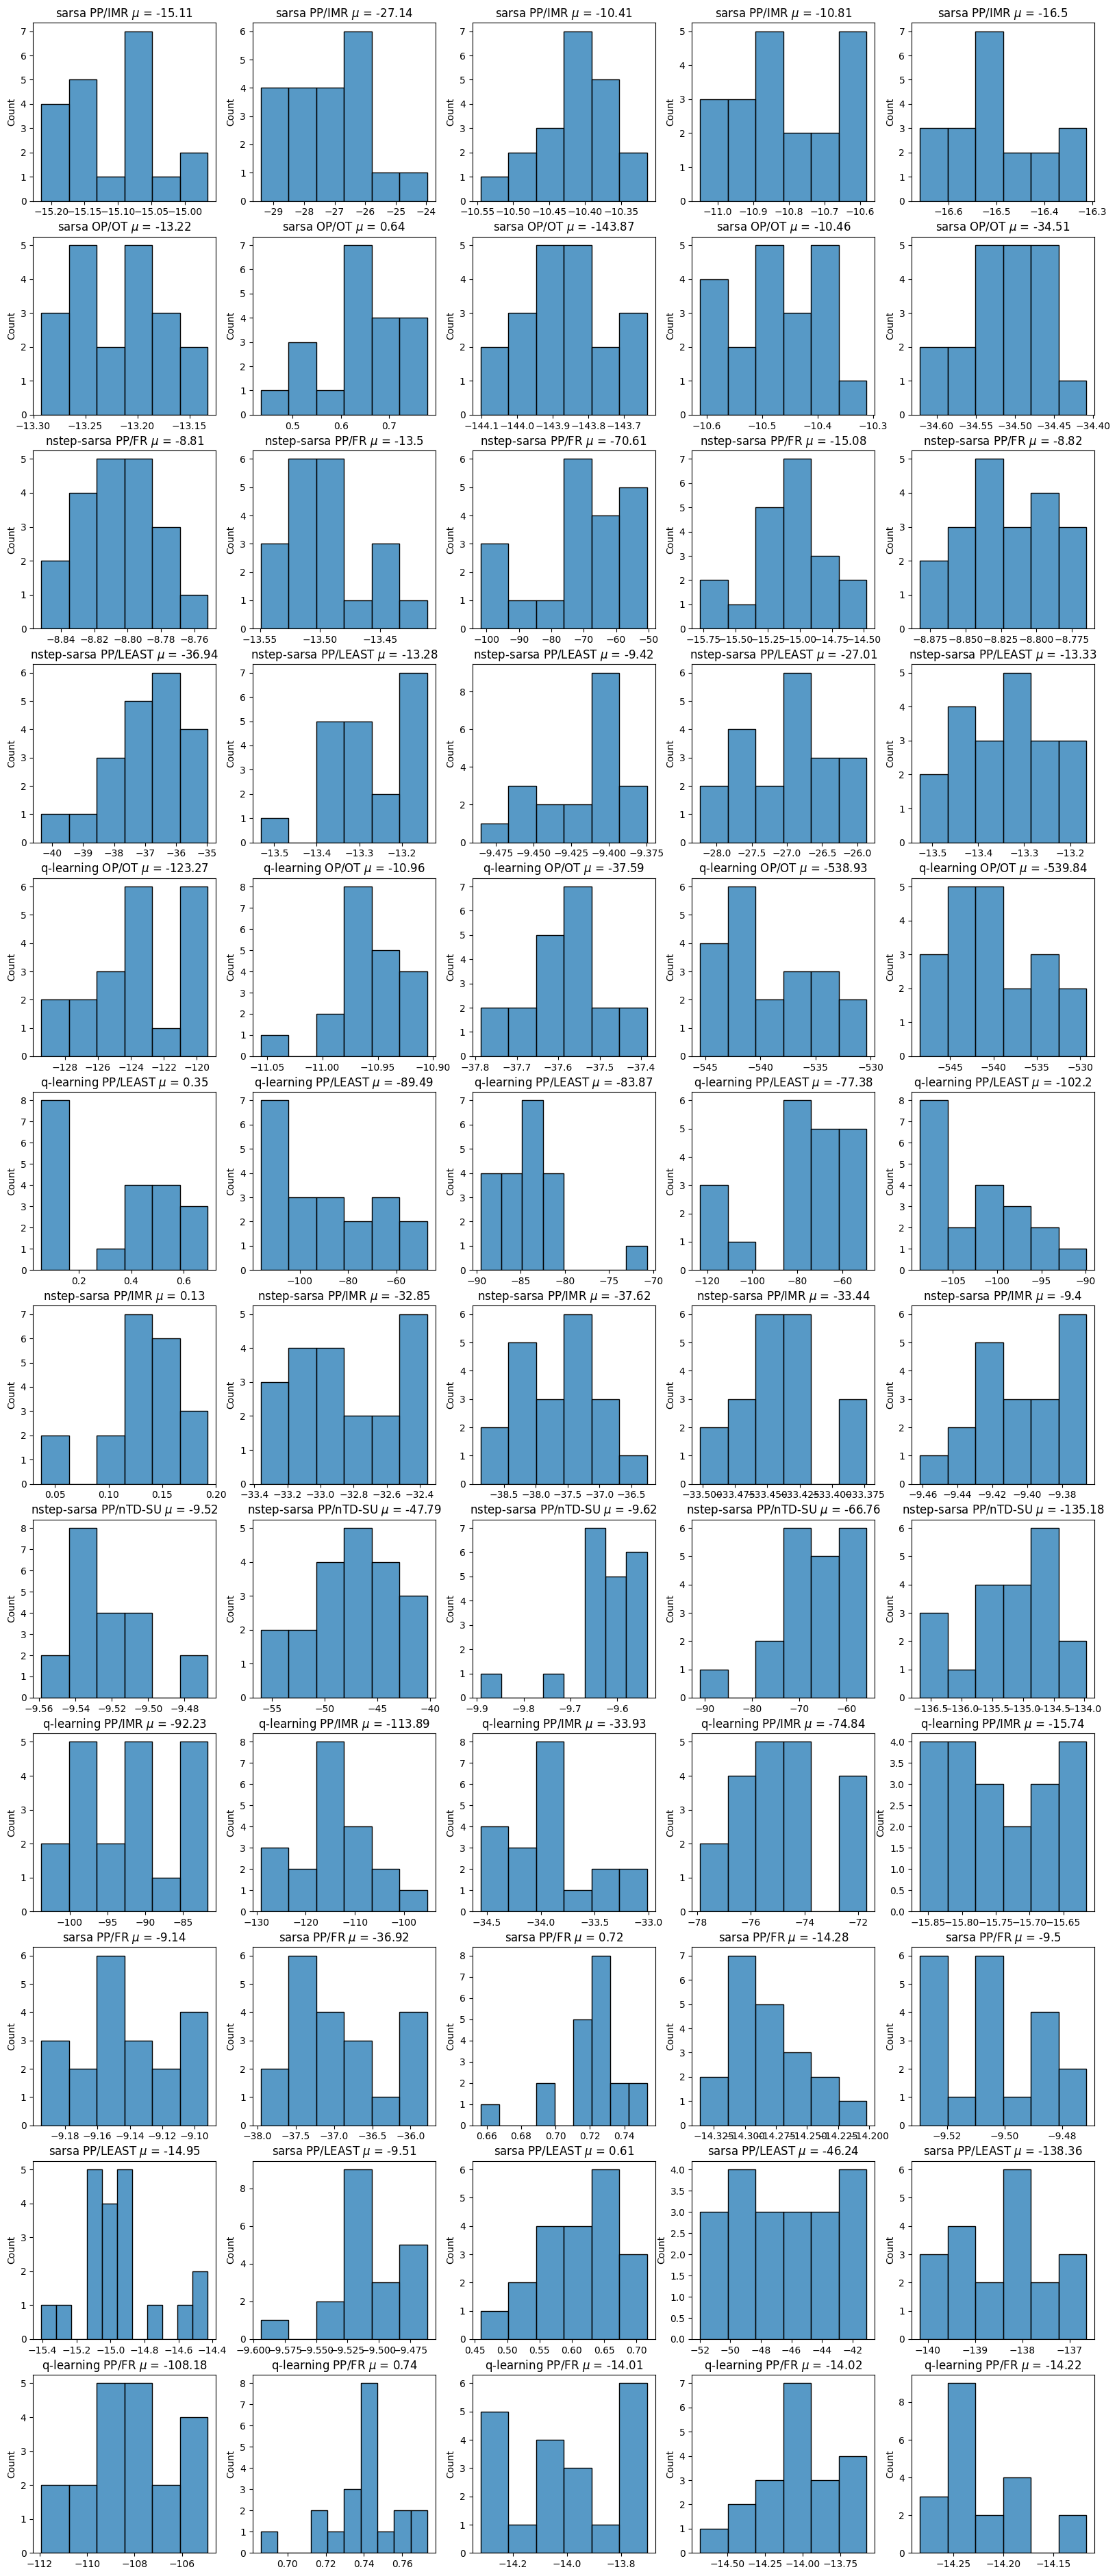

In [35]:
plot_sample_dist(df_metrics, 5)